In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv(r'/Users/jerenolsen/desktop/ML_Group33_Project/Train_rev1_2.csv', 
                 usecols = ['Id','Title','LocationRaw','LocationNormalized',
                'ContractType','ContractTime','Company','Category',
                'SalaryRaw','SalaryNormalized','SourceName'])
                 
                 #quoting=csv.QUOTE_NONE,error_bad_lines=False)


In [3]:
df


,Id,Title,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
244763,72705211,TEACHER OF SCIENCE,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk


In [4]:
#How many unique entries are there by feature? Or how many unique instances are there per feature. 

unique_dict = {}
datatypes = df.dtypes
for col in df.columns:
    print(col)
    if col == 'Id':
        continue
    if datatypes[col] == 'object':
        df[col] = df[col].values.astype('str')
    vals = df[col].values
    unique_vals = np.unique(vals)
    unique_dict[col] = unique_vals

Id
Title
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SalaryRaw
SalaryNormalized
SourceName


In [5]:
keys = unique_dict.keys()
lengths = []
for key in keys:
    lengths.append(len(unique_dict[key]))
features = [key for key in keys]
unique_vals = unique_dict.values()
df2 = pd.DataFrame({'Features':features,'Unique Values':lengths})

In [6]:
df2

,Features,Unique Values
0,Title,135436
1,LocationRaw,20986
2,LocationNormalized,2732
3,ContractType,3
4,ContractTime,3
5,Company,20813
6,Category,29
7,SalaryRaw,97286
8,SalaryNormalized,8454
9,SourceName,168


In [7]:
print(unique_dict['ContractType'])

['full_time' 'nan' 'part_time']


In [8]:
full_time_avgsalary = df.loc[df['ContractType'] =='full_time', 'SalaryNormalized']
print(len(full_time_avgsalary))
print(full_time_avgsalary.mean())

57538
31601.048385414855


In [9]:
part_time_avgsalary = df.loc[df['ContractType'] == 'part_time', 'SalaryNormalized']
print(len(part_time_avgsalary))
print(part_time_avgsalary.mean())

7904
19259.765055668016


In [10]:
Nan_contractType = df.loc[df['ContractType']=='nan']
len(Nan_contractType)

179326

In [11]:
df3 = pd.DataFrame({'Contract Type':['avg. Salary Full Time','avg. Salary Part Time'], 'Average Salary':[31601,19259]} )
df3
        

,Contract Type,Average Salary
0,avg. Salary Full Time,31601
1,avg. Salary Part Time,19259


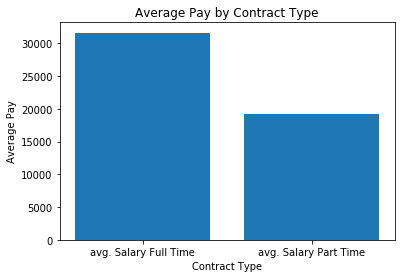

In [12]:
#Average pay by contract plot

plt.bar('Contract Type', 'Average Salary',data = df3)
plt.xlabel('Contract Type')
#plt.xticks(rotation = 90)
plt.ylabel('Average Pay')
plt.title('Average Pay by Contract Type')
plt.show()

In [52]:
df4 = pd.DataFrame({'Data Label':['Full Time Contracts','Part Time Contracts', 'All Data'],'Counts':[57538,7904,244769]})
df4

,Data Label,Counts
0,Full Time Contracts,57538
1,Part Time Contracts,7904
2,All Data,244769


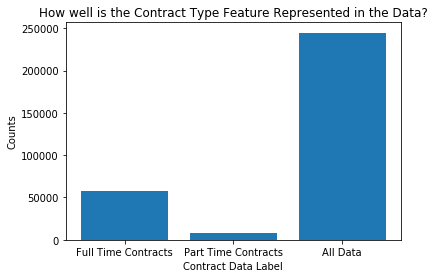

In [14]:
#How well is the contract type feature represented in the data?

plt.bar('Data Label', 'Counts',data = df4)
plt.xlabel('Contract Data Label')
#plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.title('How well is the Contract Type Feature Represented in the Data?')
plt.show()

In [15]:
#Check if there are duplicates in the dataset (there are none)
duplicates = [entry for entry in df.duplicated() if entry]
print(len(duplicates))

0


In [29]:
company_dist = {}
for c in df['Company']:
    if c in company_dist.keys():
        count = company_dist[c]
        company_dist[c] +=1
    else:
        company_dist[c]=1
print(company_dist)
print(len(company_dist))
#### There are 32430 instances of 'nan' company name ####
### 5 most common companies : ###
#'UKStaffsearch': 4997
#'CVbrowser': 2977
#'London4Jobs': 2345
#'Hays': 1784
#'JAM Recruitment Ltd': 1122

del company_dist['nan']
del company_dist['UKStaffsearch']
del company_dist['CVbrowser']
del company_dist['London4Jobs']
del company_dist['Hays']
del company_dist['JAM Recruitment Ltd']

comp_list = []
for key in company_dist:
    comp_list.append(company_dist[key])

comp_list.sort()
dist = {}
for num in comp_list:
    if num in dist:
        dist[num] +=1
    else:
        dist[num] = 2
#print(dist)
#print(len(dist))


d1 = dict(list(dist.items())[len(dist)//2:])
d2 = dict(list(dist.items())[:10])
d3 = dict(list(dist.items())[10:len(dist)//2])


{'Gregory Martin International': 44, 'Indigo 21 Ltd': 28, 'Code Blue Recruitment': 48, 'Brite Recruitment': 60, 'MatchBox Recruiting Ltd': 40, 'Chef Results': 295, 'Asset Appointments': 24, 'Rullion Engineering Ltd': 117, 'Towngate Personnel': 177, 'Clear Selection': 244, 'Bee Recruitment London Ltd': 229, 'Chess Partnership': 78, 'Hertsmere Leisure': 3, 'Kirklees Active Leisure': 3, 'Brunning & Price': 29, 'Inspire Corporation': 1, "Marston's Inns And Taverns": 12, 'nan': 32430, 'Marshall Human Resources': 3, 'Vision for Education': 12, 'Regent Recruitment': 147, 'Andy File Associates Ltd': 6, 'F1rst Commercial Recruitment Ltd': 16, 'OP': 6, 'Serata Search  Ltd': 11, 'Blues Point Ltd': 5, 'Excelsior Professional Search Ltd': 1, 'Randstad': 748, 'Champneys Health Resort': 9, 'The Works Uk Ltd': 111, 'Carnegie Consulting': 7, 'SourceDogg': 2, 'Trident': 71, 'XL Recruitment': 21, 'Onestep Recruitment Ltd': 16, 'Multi Project Support Ltd ': 1, 'CoToWork.com': 1, 'itk Recruitment': 41, 'Le

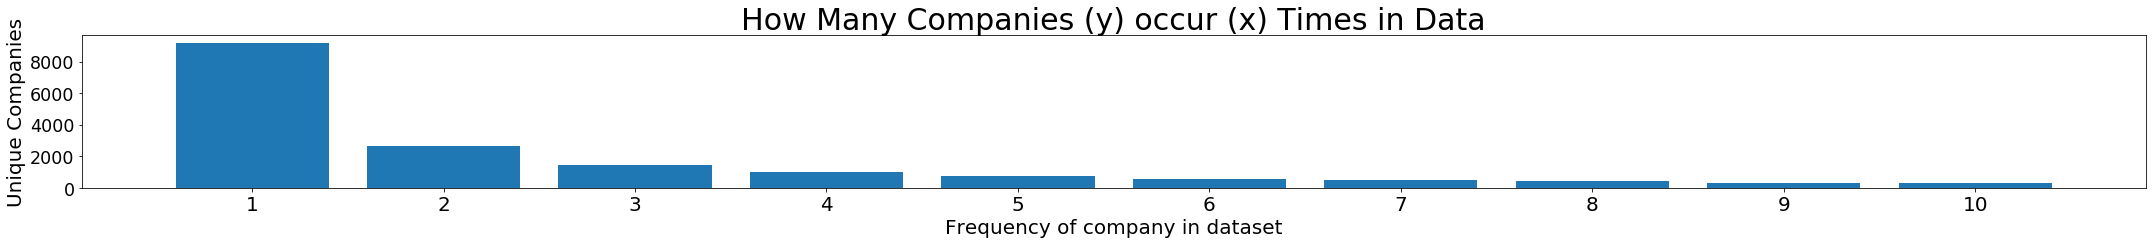

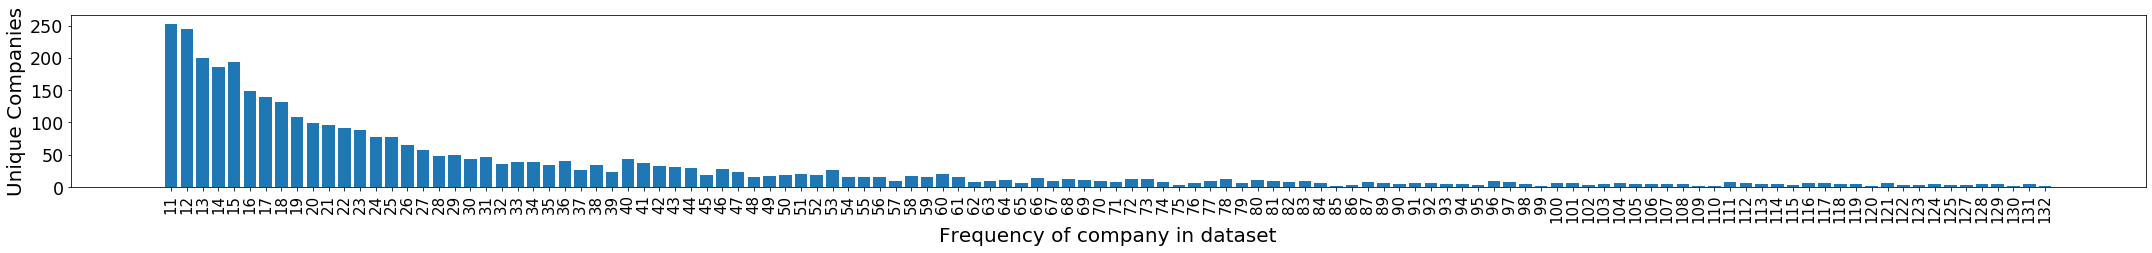

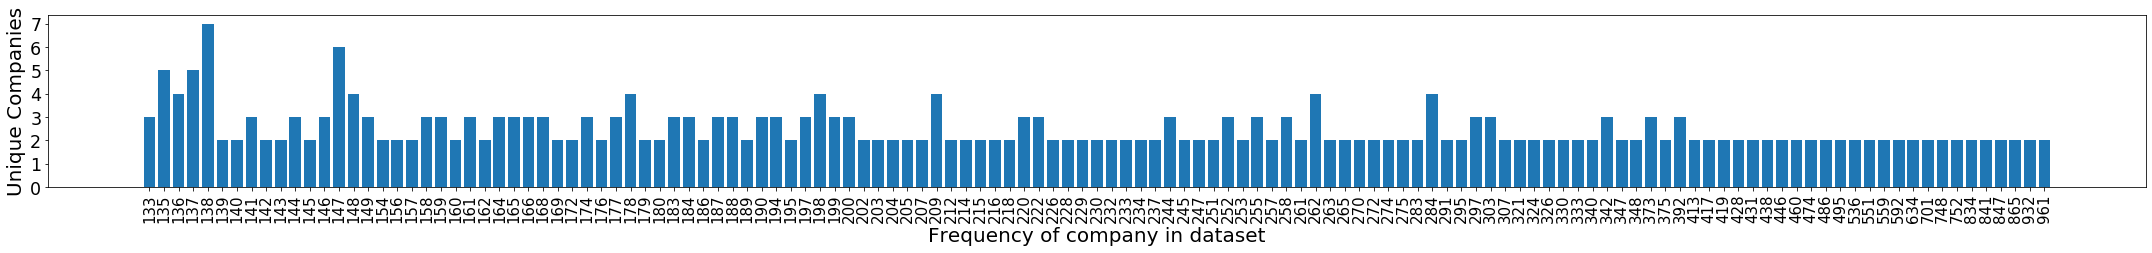

In [84]:
labels = list(d2.keys())
values = list(d2.values())
plt.bar(range(len(d2)), values, tick_label = labels)
plt.title('How Many Companies (y) occur (x) Times in Data',fontsize = 30)
plt.xlabel('Frequency of company in dataset',fontsize = 20)
plt.ylabel('Unique Companies',fontsize =20)
plt.xticks(fontsize=20)
plt.yticks(fontsize = 17.5)
plt.rcParams["figure.figsize"] = [30, 3.50]
plt.rcParams["figure.autolayout"] = True
spacing = 0.200
#fig.subplots_adjust(bottom=spacing)
plt.show()

labels = list(d3.keys())
values = list(d3.values())
plt.bar(range(len(d3)), values, tick_label = labels)
plt.xlabel('Frequency of company in dataset',fontsize = 20)
plt.ylabel('Unique Companies',fontsize =20)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize = 17.5)
plt.rcParams["figure.figsize"] = [30, 3.50]
plt.rcParams["figure.autolayout"] = True
spacing = 0.200
#fig.subplots_adjust(bottom=spacing)
plt.show()

labels = list(d1.keys())
values = list(d1.values())
plt.bar(range(len(d1)), values, tick_label = labels)
plt.xlabel('Frequency of company in dataset',fontsize = 20)
plt.ylabel('Unique Companies',fontsize =20)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize = 17.5)
plt.rcParams["figure.figsize"] = [30, 3.50]
plt.rcParams["figure.autolayout"] = True
spacing = 0.200
#fig.subplots_adjust(bottom=spacing)
plt.show()


In [ ]:
df.describe()


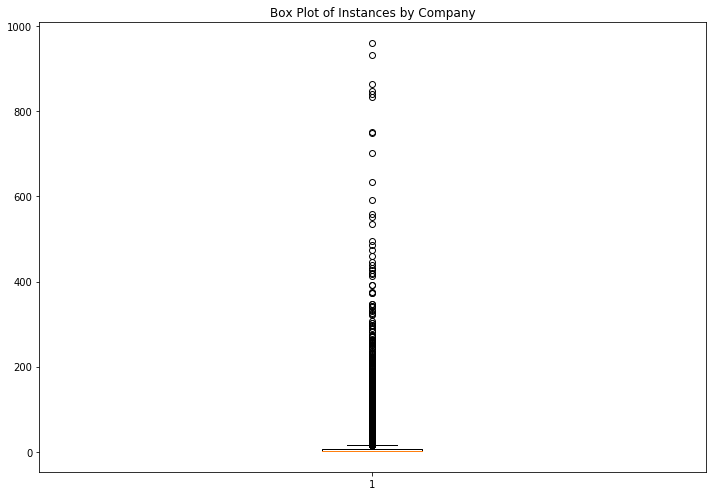

median =  2.0
mean =  9.569519873119622


In [83]:
fig = plt.figure(figsize = [10,7])
comp_list = np.array(comp_list)
plt.boxplot(comp_list)
plt.title('Box Plot of Instances by Company')
plt.show()
### 5 most common companies : ### (excluded from plots)
#'UKStaffsearch': 4997
#'CVbrowser': 2977
#'London4Jobs': 2345
#'Hays': 1784
#'JAM Recruitment Ltd': 1122
mid = len(comp_list) // 2
res = (comp_list[mid] + comp_list[~mid]) / 2
print('median = ',res)
print('mean = ',sum(comp_list)/len(comp_list))



In [44]:
job_categories = {}
for c in df['Category']:
    if c in job_categories.keys():
        count = job_categories[c]
        job_categories[c] +=1
    else:
        job_categories[c]=1
print(job_categories)


{'Engineering Jobs': 25174, 'HR & Recruitment Jobs': 7713, 'Accounting & Finance Jobs': 21846, 'Healthcare & Nursing Jobs': 21076, 'Other/General Jobs': 17055, 'Hospitality & Catering Jobs': 11351, 'IT Jobs': 38483, 'Customer Services Jobs': 6063, 'Travel Jobs': 3126, 'Sales Jobs': 17272, 'Manufacturing Jobs': 3765, 'Teaching Jobs': 12637, 'Creative & Design Jobs': 1605, 'Trade & Construction Jobs': 8837, 'Property Jobs': 1038, 'Admin Jobs': 7614, 'Legal Jobs': 3939, 'Retail Jobs': 6584, 'Consultancy Jobs': 3263, 'Energy, Oil & Gas Jobs': 2255, 'Logistics & Warehouse Jobs': 3633, 'PR, Advertising & Marketing Jobs': 8854, 'Charity & Voluntary Jobs': 2332, 'Scientific & QA Jobs': 2489, 'Maintenance Jobs': 1542, 'Domestic help & Cleaning Jobs': 291, 'Social work Jobs': 3455, 'Graduate Jobs': 1331, 'Part time Jobs': 145}


In [46]:
categ_list = []
for key in job_categories:
    categ_list.append(job_categories[key])
    
sorted_values = sorted(job_categories.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in job_categories.keys():
        if job_categories[k] == i:
            sorted_dict[k] = job_categories[k]
            break

print(sorted_dict)

{'Part time Jobs': 145, 'Domestic help & Cleaning Jobs': 291, 'Property Jobs': 1038, 'Graduate Jobs': 1331, 'Maintenance Jobs': 1542, 'Creative & Design Jobs': 1605, 'Energy, Oil & Gas Jobs': 2255, 'Charity & Voluntary Jobs': 2332, 'Scientific & QA Jobs': 2489, 'Travel Jobs': 3126, 'Consultancy Jobs': 3263, 'Social work Jobs': 3455, 'Logistics & Warehouse Jobs': 3633, 'Manufacturing Jobs': 3765, 'Legal Jobs': 3939, 'Customer Services Jobs': 6063, 'Retail Jobs': 6584, 'Admin Jobs': 7614, 'HR & Recruitment Jobs': 7713, 'Trade & Construction Jobs': 8837, 'PR, Advertising & Marketing Jobs': 8854, 'Hospitality & Catering Jobs': 11351, 'Teaching Jobs': 12637, 'Other/General Jobs': 17055, 'Sales Jobs': 17272, 'Healthcare & Nursing Jobs': 21076, 'Accounting & Finance Jobs': 21846, 'Engineering Jobs': 25174, 'IT Jobs': 38483}


In [66]:
categories = pd.DataFrame(sorted_dict.items())

[145, 291, 1038, 1331, 1542, 1605, 2255, 2332, 2489, 3126, 3263, 3455, 3633, 3765, 3939, 6063, 6584, 7614, 7713, 8837, 8854, 11351, 12637, 17055, 17272, 21076, 21846, 25174, 38483]
['Part time Jobs', 'Domestic help & Cleaning Jobs', 'Property Jobs', 'Graduate Jobs', 'Maintenance Jobs', 'Creative & Design Jobs', 'Energy, Oil & Gas Jobs', 'Charity & Voluntary Jobs', 'Scientific & QA Jobs', 'Travel Jobs', 'Consultancy Jobs', 'Social work Jobs', 'Logistics & Warehouse Jobs', 'Manufacturing Jobs', 'Legal Jobs', 'Customer Services Jobs', 'Retail Jobs', 'Admin Jobs', 'HR & Recruitment Jobs', 'Trade & Construction Jobs', 'PR, Advertising & Marketing Jobs', 'Hospitality & Catering Jobs', 'Teaching Jobs', 'Other/General Jobs', 'Sales Jobs', 'Healthcare & Nursing Jobs', 'Accounting & Finance Jobs', 'Engineering Jobs', 'IT Jobs']


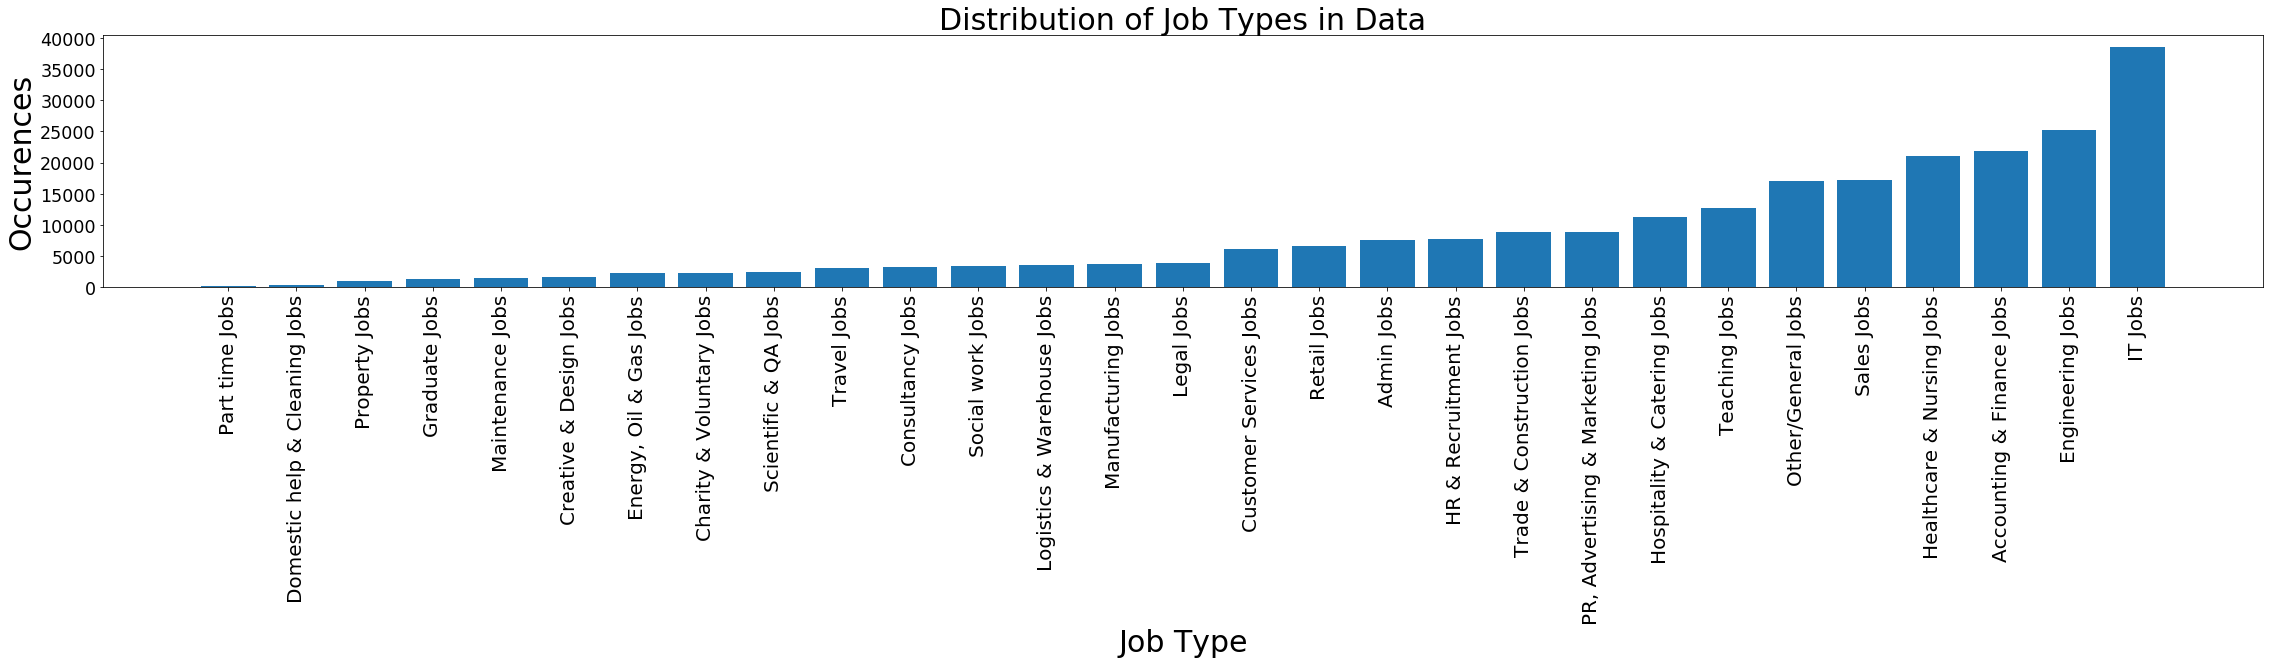

In [81]:
fig = plt.figure()
job_types = []
for key in sorted_dict.keys():
    job_types.append(key)
occurences = []
for item in sorted_dict.items():
    occurences.append(item[1])
print(occurences)
print(job_types)
ax = fig.add_axes([0,0,1,1])
ax.bar(job_types,occurences)
plt.ylabel('Occurences',fontsize = 30)
plt.xlabel('Job Type',fontsize =30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 17.5)
plt.title("Distribution of Job Types in Data",fontsize = 30)
plt.show()